In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def DFT(x):
    N = np.size(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    return np.dot(np.exp(-2j * np.pi * k * n / N), x)
def iDFT(x):
    N = np.size(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    return np.dot(np.exp(2j * np.pi * k * n / N), x)
def FFT(x):
    N = len(x)
    if N == 1:
        return x
    else:
        X_even = FFT(x[0::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        X = np.concatenate([X_even+factor[:int(N/2)]*X_odd, X_even+factor[int(N/2):]*X_odd])
        return X
def iFFT(x):
    return _iFFT(x)/len(x)
def _iFFT(x):
    N = len(x)
    if N == 1:
        return x
    else:
        X_even = _iFFT(x[0::2])
        X_odd = _iFFT(x[1::2])
        factor = np.exp(2j * np.pi * np.arange(N) / N)
        X = np.concatenate([X_even+factor[:int(N/2)]*X_odd, X_even+factor[int(N/2):]*X_odd])
        return X
def FFTfreq(n, d):
    pos = np.arange(n//2)
    neg = np.arange(-n//2,0,1)
    return np.concatenate([pos,neg]) / (n*d)

In [3]:
# Total sampled time
time = np.linspace(0, 2, 2**10)
# Sampled interval
dt = time[1] - time[0]

# Compound signal
real_signal = np.zeros_like(time, dtype = float)
complex_signal = np.zeros_like(time, dtype = complex)
intrinsic_freq = [1,2,8]
constant = 0.025
for freq in intrinsic_freq:
    real_signal += np.cos(2*np.pi * freq * time)
    complex_signal += np.exp(1j * 2*np.pi * freq * time)
real_signal += constant
complex_signal += constant

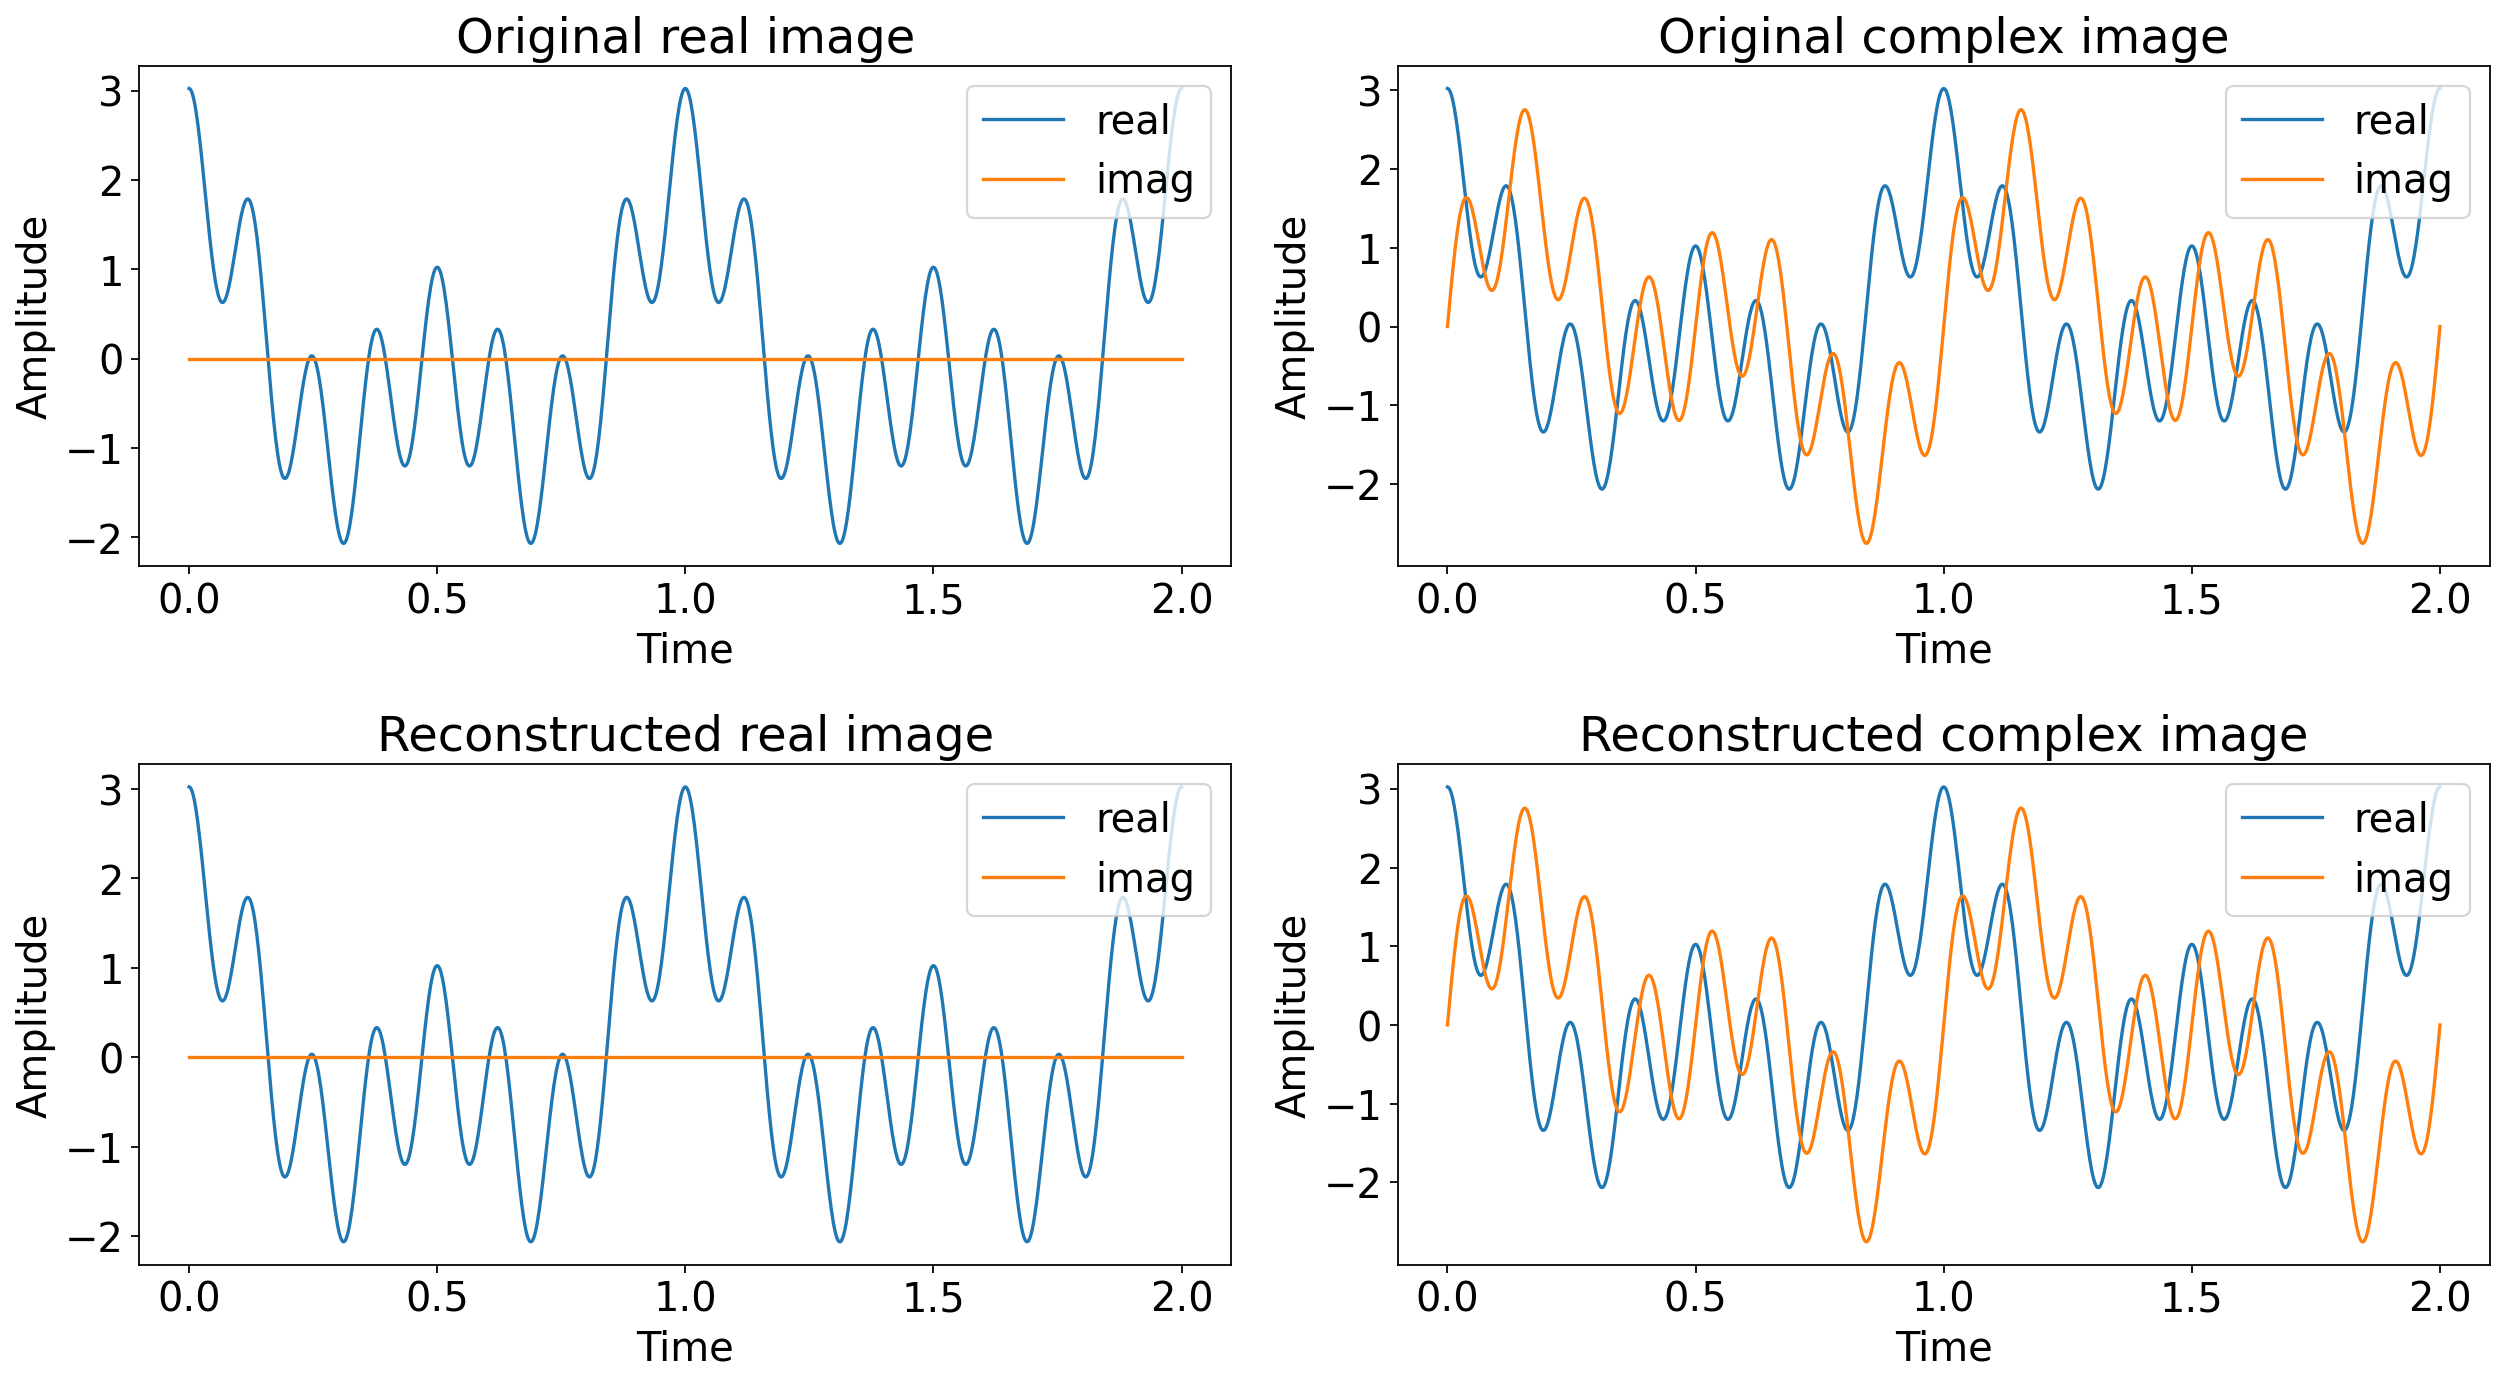

In [4]:
plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(nrows=2, 
                         ncols=2,
                         figsize = (16, 9),
                         dpi = 160)
#plt.rcParams.update({'font.size': 18})

axes[0,0].plot(time, np.real(real_signal), label = "real")
axes[0,0].plot(time, np.imag(real_signal), label = "imag")
axes[0,0].legend(loc = 1)
axes[0,0].set_xticks(np.linspace(0,2,5))
axes[0,0].set_yticks(np.linspace(-2,3,6))
axes[0,0].set_xlabel("Time")
axes[0,0].set_ylabel("Amplitude")
axes[0,0].set_title("Original real image")

axes[0,1].plot(time, np.real(complex_signal), label = "real")
axes[0,1].plot(time, np.imag(complex_signal), label = "imag")
axes[0,1].legend(loc = 1)
axes[0,1].set_xticks(np.linspace(0,2,5))
axes[0,1].set_yticks(np.linspace(-2,3,6))
axes[0,1].set_xlabel("Time")
axes[0,1].set_ylabel("Amplitude")
axes[0,1].set_title("Original complex image")

spectral = FFT(real_signal)
freq = FFTfreq(real_signal.size, d=dt)
reconstruct_signal = iFFT(spectral)
axes[1,0].plot(time, np.real(reconstruct_signal), label = "real")
axes[1,0].plot(time, np.imag(reconstruct_signal), label = "imag")
axes[1,0].legend(loc = 1)
axes[1,0].set_xticks(np.linspace(0,2,5))
axes[1,0].set_yticks(np.linspace(-2,3,6))
axes[1,0].set_xlabel("Time")
axes[1,0].set_ylabel("Amplitude")
axes[1,0].set_title("Reconstructed real image")

spectral = FFT(complex_signal)
freq = FFTfreq(complex_signal.size, d=dt)
reconstruct_signal = iFFT(spectral)
axes[1,1].plot(time, np.real(reconstruct_signal), label = "real")
axes[1,1].plot(time, np.imag(reconstruct_signal), label = "imag")
axes[1,1].legend(loc = 1)
axes[1,1].set_xticks(np.linspace(0,2,5))
axes[1,1].set_yticks(np.linspace(-2,3,6))
axes[1,1].set_xlabel("Time")
axes[1,1].set_ylabel("Amplitude")
axes[1,1].set_title("Reconstructed complex image")

fig.set_tight_layout(True)